In [1]:
# grader-required-cell

import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [13]:
train_gen = ImageDataGenerator(rescale = 1.0/255)

train_flow = train_gen.flow_from_directory('Data_v1/Train', target_size=(80,80), class_mode='categorical',
                                           batch_size = 32, shuffle = True)

val_gen = ImageDataGenerator(rescale = 1.0/255)

val_flow = val_gen.flow_from_directory('Data_v1/Val', target_size=(80,80), class_mode='categorical',
                                         batch_size = 32, shuffle = True)


Found 749 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [14]:
def create_model() :
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(80, 80, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(3, activation='sigmoid')
    ])
    return model

In [19]:
model= create_model()
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 39, 39, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 18, 18, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)       

In [20]:
history = model.fit(train_flow, epochs = 10, validation_data=val_flow)

Epoch 1/10
24/24 [==============================] - 3s 109ms/step - loss: 1.0326 - accuracy: 0.5861 - val_loss: 0.5225 - val_accuracy: 0.7667
Epoch 2/10
24/24 [==============================] - 2s 101ms/step - loss: 0.2668 - accuracy: 0.8959 - val_loss: 0.3931 - val_accuracy: 0.8600
Epoch 3/10
24/24 [==============================] - 2s 103ms/step - loss: 0.1276 - accuracy: 0.9573 - val_loss: 0.4414 - val_accuracy: 0.8067
Epoch 4/10
24/24 [==============================] - 2s 100ms/step - loss: 0.0426 - accuracy: 0.9920 - val_loss: 0.4894 - val_accuracy: 0.8467
Epoch 5/10
24/24 [==============================] - 2s 103ms/step - loss: 0.0179 - accuracy: 0.9960 - val_loss: 0.3642 - val_accuracy: 0.8600
Epoch 6/10
24/24 [==============================] - 2s 101ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.5906 - val_accuracy: 0.8400
Epoch 7/10
24/24 [==============================] - 2s 101ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 0.7725 - val_accuracy: 0.8200
Epoch 

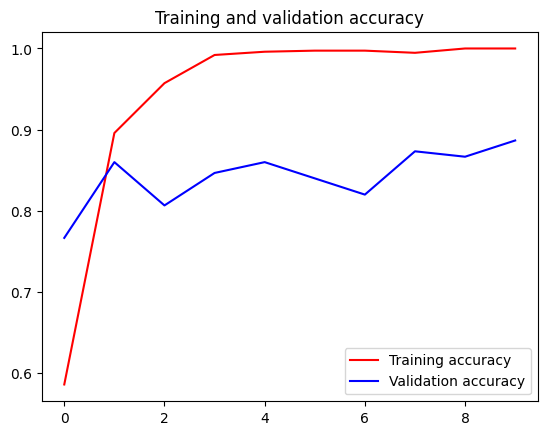

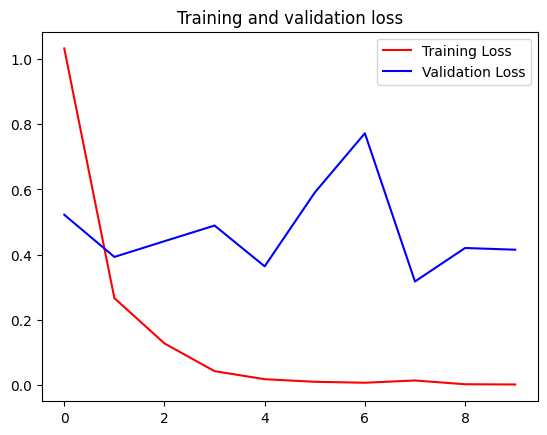

In [21]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
from tensorflow.keras.models import save_model

save_model(model, "./Saved Models/V1.h5")

C:\Users\Anav Agrawal\AppData\Local\Temp\ipykernel_29416\3250212604.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "./Saved Models/V1.h5")
